In [14]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import scipy.stats as st
import seaborn as sns
import re
import matplotlib.cm as cm
import ipympl


plt.style.use('seaborn-pastel')

## Load and data cleaning

In [15]:
dict_datasets={
    'Tigers':'List of Detroit Tigers seasons - Wikipedia.html',
    'Lions':'List of Detroit Lions seasons - Wikipedia.html',
    'Pistons':'List of Detroit Pistons seasons - Wikipedia.html',
    'RedWings':'List of Detroit Red Wings seasons - Wikipedia.html'
}

In [16]:
#Lions
df_lions=pd.read_html(dict_datasets['Lions'])[1][6:94]
df_lions

Season  Team League Conference Division Regular season  \
   Season  Team League Conference Division         Finish   
6    1934  1934    NFL        NaN  Western            2nd   
7    1935  1935    NFL        NaN  Western            1st   
8    1936  1936    NFL        NaN  Western            3rd   
9    1937  1937    NFL        NaN  Western          T–2nd   
10   1938  1938    NFL        NaN  Western            2nd   
..    ...   ...    ...        ...      ...            ...   
89   2017  2017    NFL        NFC    North            2nd   
90   2018  2018    NFL        NFC    North            4th   
91   2019  2019    NFL        NFC    North            4th   
92   2020  2020    NFL        NFC    North            4th   
93   2021  2021    NFL        NFC    North            4th   

                                                                             \
   .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W   
6                                                  10                         
7                                                   7                         
8                                                   8                         
9                                                   7                         
10                                                  7                         
..                                                ...                         
89                                                  9                         
90                                                  6                         
91                                                  3                         
92                                                  5                         
93                                                  3                         

                                     Postseason results Awards  \
     L  T   Pct                      Postseason results Awards   
6    3  0  .769                                     NaN    NaN   
7    3  2  .667  Won NFL Championship (1) (Giants) 26–7    NaN   
8    4  0  .667                                     NaN    NaN   
9    4  0  .636                                     NaN    NaN   
10   4  0  .636                                     NaN    NaN   
..  .. ..   ...                                     ...    ...   
89   7  0  .563                                     NaN    NaN   
90  10  0  .375                                     NaN    NaN   
91  12  1  .219                                     NaN    NaN   
92  11  0  .313                                     NaN    NaN   
93  13  1  .206                                     NaN    NaN   

                               Head coaches      Ref.  
                               Head coaches      Ref.  
6                      George "Potsy" Clark       NaN  
7                      George "Potsy" Clark       NaN  
8                      George "Potsy" Clark       NaN  
9                               Dutch Clark       NaN  
10                              Dutch Clark       NaN  
..                                      ...       ...  
89                             Jim Caldwell       NaN  
90                            Matt Patricia       NaN  
91                            Matt Patricia       NaN  
92  Matt Patricia (4–7)Darrell Bevell (1–4)       NaN  
93                             Dan Campbell  [note 8]  

[88 rows x 14 columns]

In [17]:
lions=pd.DataFrame()
lions['Year']=df_lions['Team']['Team']
lions['Wins']=df_lions['Regular season']['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W'].astype(int)
lions['Losses']=df_lions['Regular season']['L'].astype(int)
lions['Win %_Lions']=lions['Wins']/(lions['Wins']+lions['Losses'])
lions

,Year,Wins,Losses,Win %_Lions
6,1934,10,3,0.769231
7,1935,7,3,0.700000
8,1936,8,4,0.666667
9,1937,7,4,0.636364
10,1938,7,4,0.636364
...,...,...,...,...
89,2017,9,7,0.562500
90,2018,6,10,0.375000
91,2019,3,12,0.200000
92,2020,5,11,0.312500


In [18]:
#Tigers
df_tigers=pd.read_html(dict_datasets['Tigers'])[1][0:123]
df_tigers

,Season,Level,League,Division,Finish,Wins,Losses,Win%,GB,Post-Season,Awards,Unnamed: 11
0,1901,MLB,AL,NaN,3rd,74,61,.548,8½,NaN,NaN,NaN
1,1902,MLB,AL,NaN,7th,52,83,.385,30½,NaN,NaN,NaN
2,1903,MLB,AL,NaN,5th,65,71,.478,25,NaN,NaN,NaN
3,1904,MLB,AL,NaN,7th,62,90,.408,32,NaN,NaN,NaN
4,1905,MLB,AL,NaN,3rd,79,74,.516,15½,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
118,2018,MLB,AL,Central,3rd,64,98,.395,27,NaN,NaN,NaN
119,2019,MLB,AL,Central,5th,47,114,.292,53½,NaN,NaN,NaN
120,2020,MLB,AL,Central,5th,23,35,.397,12,NaN,NaN,NaN
121,2021,MLB,AL,Central,3rd,77,85,.475,16,NaN,NaN,NaN


In [19]:
tigers=pd.DataFrame()
tigers[['Year','Wins','Losses']]=df_tigers[['Season','Wins','Losses']].copy()
tigers['Year']=tigers['Year'].astype(str)
tigers['Year']=tigers['Year'].astype(object)
tigers['Wins']=tigers['Wins'].astype(int)
tigers['Losses']=tigers['Losses'].astype(int)
tigers['Win %_Tigers']=tigers['Wins']/(tigers['Wins']+tigers['Losses'])
tigers

,Year,Wins,Losses,Win %_Tigers
0,1901,74,61,0.548148
1,1902,52,83,0.385185
2,1903,65,71,0.477941
3,1904,62,90,0.407895
4,1905,79,74,0.516340
...,...,...,...,...
118,2018,64,98,0.395062
119,2019,47,114,0.291925
120,2020,23,35,0.396552
121,2021,77,85,0.475309


In [20]:
#Pistons
df_pistons=pd.read_html(dict_datasets['Pistons'])[1][19:84]
df_pistons

,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Season,Team,Conference,Finish,Division,Finish.1,Wins,Losses,Win%,GB,Playoffs,Awards,Head Coach
19,1957–58,1957–58,—,NaN,Western,2nd,33,39,.458,8,Won Division Semifinals (Royals) 2–0 Lost Divi...,NaN,Charley EckmanRed Rocha
20,1958–59,1958–59,—,NaN,Western,3rd,28,44,.389,21,Lost Division Semifinals (Lakers) 2–1,NaN,Red Rocha
21,1959–60,1959–60,—,NaN,Western,2nd,30,45,.400,16,Lost Division Semifinals (Lakers) 2–0,NaN,Red RochaDick McGuire
22,1960–61,1960–61,—,NaN,Western,3rd,34,45,.430,17,Lost Division Semifinals (Lakers) 3–2,NaN,Dick McGuire
23,1961–62,1961–62,—,NaN,Western,3rd,37,43,.463,17,Won Division Semifinals (Royals) 3–1 Lost Divi...,NaN,Dick McGuire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2017–18,2017–18,Eastern,9th,Central,4th,39,43,.476,11,NaN,NaN,Stan Van Gundy
80,2018–19,2018–19,Eastern,8th,Central,3rd,41,41,.500,19,Lost First Round (Bucks) 4–0,NaN,Dwane Casey
81,2019–20,2019–20,Eastern,13th,Central,4th,20,46,.303,32.5,NaN,NaN,Dwane Casey
82,2020–21,2020–21,Eastern,15th,Central,5th,20,52,.278,26,NaN,NaN,Dwane Casey


In [21]:
pistons=pd.DataFrame()
pistons['Year']=df_pistons['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Season'].str[:4]
pistons[['Wins','Losses']]=df_pistons[['Wins','Losses']]
pistons['Wins']=pistons['Wins'].astype(int)
pistons['Losses']=pistons['Losses'].astype(int)
pistons['Win %_Pistons']=pistons['Wins']/(pistons['Wins']+pistons['Losses'])
pistons

,Year,Wins,Losses,Win %_Pistons
19,1957,33,39,0.458333
20,1958,28,44,0.388889
21,1959,30,45,0.400000
22,1960,34,45,0.430380
23,1961,37,43,0.462500
...,...,...,...,...
79,2017,39,43,0.475610
80,2018,41,41,0.500000
81,2019,20,46,0.303030
82,2020,20,52,0.277778


In [22]:
#Red_Wings
df_redw=pd.read_html(dict_datasets['RedWings'])[2][:96]
df_redw

NHL season Franchise season Conference     Division  \
     NHL season Franchise season Conference     Division   
0       1926–27       1926–27[a]          —  American[b]   
1       1927–28          1927–28          —     American   
2       1928–29          1928–29          —     American   
3       1929–30          1929–30          —     American   
4       1930–31       1930–31[c]          —     American   
..          ...              ...        ...          ...   
91      2017–18          2017–18    Eastern     Atlantic   
92      2018–19          2018–19    Eastern     Atlantic   
93  2019–20 [p]          2019–20    Eastern     Atlantic   
94  2020–21 [q]          2020–21          —      Central   
95      2021–22          2021–22    Eastern     Atlantic   

   Regular season[3][6][7][8]                                  Postseason     \
                       Finish  GP   W   L  T  OT Pts   GF   GA         GP  W   
0                         5th  44  12  28  4   —  28   76  105          —  —   
1                         4th  44  19  19  6   —  44   88   79          —  —   
2                         3rd  44  19  16  9   —  47   72   63          2  0   
3                         4th  44  14  24  6   —  34  117  133          —  —   
4                         4th  44  16  21  7   —  39  102  105          —  —   
..                        ...  ..  ..  .. ..  ..  ..  ...  ...        ... ..   
91                        5th  82  30  39  —  13  73  217  255          —  —   
92                        7th  82  32  40  —  10  74  227  277          —  —   
93                        8th  71  17  49  —   5  39  145  267          —  —   
94                        7th  56  19  27  —  10  48  127  171          —  —   
95                        5th  82  32  40  —  10  74  230  312          —  —   

                                                                   
    L  T GF GA                                             Result  
0   —  —  —  —                                    Did not qualify  
1   —  —  —  —                                    Did not qualify  
2   2  0  2  7  Lost Quarterfinals to Toronto Maple Leafs, 2–7...  
3   —  —  —  —                                    Did not qualify  
4   —  —  —  —                                    Did not qualify  
.. .. .. .. ..                                                ...  
91  —  —  —  —                                    Did not qualify  
92  —  —  —  —                                    Did not qualify  
93  —  —  —  —                                    Did not qualify  
94  —  —  —  —                                    Did not qualify  
95  —  —  —  —                                    Did not qualify  

[96 rows x 20 columns]

In [23]:
redw=pd.DataFrame()
redw['Year']=df_redw['NHL season']['NHL season'].str[:4]
redw[['Wins','Losses']]=df_redw['Regular season[3][6][7][8]'][['W','L']]
redw=redw.set_index('Year')

#Missing 2004 value
redw.loc['2004',['Wins','Losses']]=redw.loc['2003',['Wins','Losses']]

redw['Wins']=redw['Wins'].astype(int)
redw['Losses']=redw['Losses'].astype(int)
redw['Win %_RedWings']=redw['Wins']/(redw['Wins']+redw['Losses'])
redw=redw.reset_index()
redw

,Year,Wins,Losses,Win %_RedWings
0,1926,12,28,0.300000
1,1927,19,19,0.500000
2,1928,19,16,0.542857
3,1929,14,24,0.368421
4,1930,16,21,0.432432
...,...,...,...,...
91,2017,30,39,0.434783
92,2018,32,40,0.444444
93,2019,17,49,0.257576
94,2020,19,27,0.413043


In [24]:
#Merge data for visualization
Big4_Michigan=pd.merge(lions.drop(['Wins','Losses'],axis=1),tigers.drop(['Wins','Losses'],axis=1),on='Year')
Big4_Michigan=pd.merge(Big4_Michigan,pistons.drop(['Wins','Losses'],axis=1),on='Year')
Big4_Michigan=pd.merge(Big4_Michigan,redw.drop(['Wins','Losses'],axis=1),on='Year')
Big4_Michigan

,Year,Win %_Lions,Win %_Tigers,Win %_Pistons,Win %_RedWings
0,1957,0.666667,0.506494,0.458333,0.500000
1,1958,0.363636,0.500000,0.388889,0.403226
2,1959,0.272727,0.493506,0.400000,0.472727
3,1960,0.583333,0.461039,0.430380,0.462963
4,1961,0.615385,0.623457,0.462500,0.410714
...,...,...,...,...,...
61,2017,0.562500,0.395062,0.475610,0.434783
62,2018,0.375000,0.395062,0.500000,0.444444
63,2019,0.200000,0.291925,0.303030,0.257576
64,2020,0.312500,0.396552,0.277778,0.413043


## Visualization

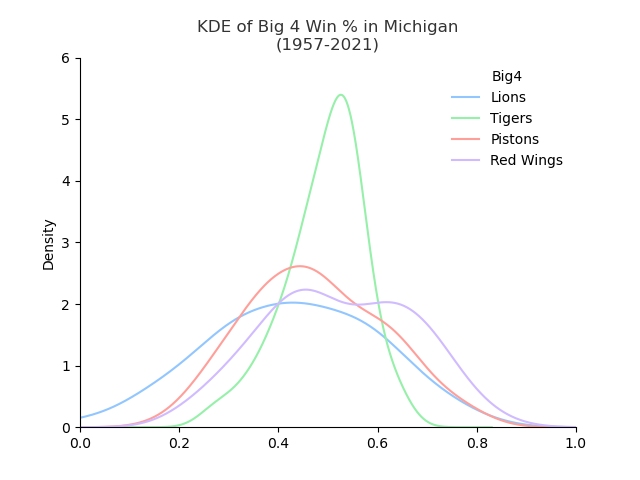

In [25]:
%matplotlib widget
#Drawing KDE
kde=Big4_Michigan.plot.kde()
[kde.spines[loc].set_visible(False) for loc in ['top','right']]
kde.axis([0,1,0,6])
kde.set_title('KDE of Big 4 Win % in Michigan\n(1957-2021)',alpha=0.8)
kde.legend(['Lions','Tigers','Pistons','Red Wings'],loc='best',frameon=False,title='Big4',fontsize=10)

## Visualize Line-Plot

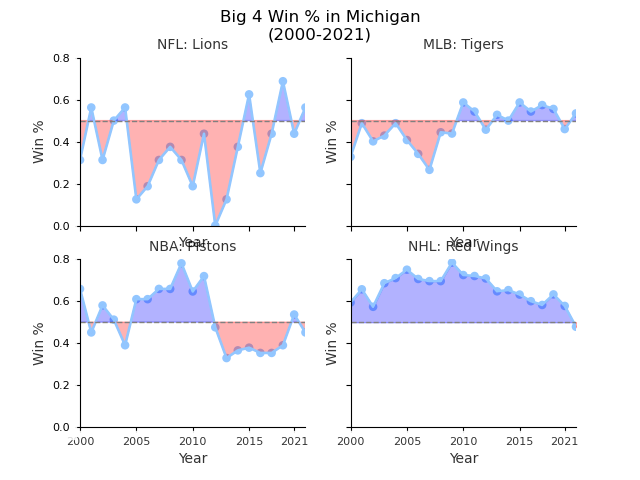

In [26]:
Big4_Michigan_2021=Big4_Michigan[40:]
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True)
axs=[ax1,ax2,ax3,ax4]

fig.suptitle('Big 4 Win % in Michigan\n(2000-2021)');

#Properties
columns_w=['Win %_Lions','Win %_Tigers','Win %_Pistons','Win %_RedWings']
colors=['g','b','y','r']
titles=['NFL: Lions','MLB: Tigers','NBA: Pistons','NHL: Red Wings']
axis=[0,20,0,0.8]

y=0.5

for i in range(len(axs)):
    #Drawing the subplot
    ax=axs[i]
    #ax.plot(Big4_Michigan_2021['Year'],Big4_Michigan_2021[columns_w[i]],c=colors[i],alpha=0.5)
    #sns.lineplot(x=Big4_Michigan_2021['Year'],y=Big4_Michigan_2021[columns_w[i]],c=colors[i],alpha=0.5,ax=ax)
    sns.pointplot(x=Big4_Michigan_2021['Year'],y=Big4_Michigan_2021[columns_w[i]],c=colors[i],scale=0.7,alpha=0.5,ax=ax)
    ax.axhline(y=0.5,color='gray',linewidth=1,linestyle='--')
    ax.fill_between(range(0,26),0.5,Big4_Michigan_2021[columns_w[i]],where=(Big4_Michigan_2021[columns_w[i]]<y),color='red',interpolate=True,alpha=0.3)
    ax.fill_between(range(0,26),0.5,Big4_Michigan_2021[columns_w[i]],where=(Big4_Michigan_2021[columns_w[i]]>y),color='blue',interpolate=True,alpha=0.3)

    #Beautify
    [ax.spines[loc].set_visible(False) for loc in ['top','right']] #Turn off some plot rectangles
    ax.set_ylabel('Win %',alpha=0.8)
    ax.set_xlabel('Year',alpha=0.8)
    ax.set_title(titles[i],fontsize=10,alpha=0.8)
    ax.axis(axis)
    ax.set_xticks(np.append(np.arange(0,20,5),19))
    ax.set_xticklabels(['2000','2005','2010','2015','2021'],fontsize=8,alpha=0.8)
    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_bbox(dict(facecolor='white',edgecolor='white',alpha=0.8))